In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")


In [2]:
path = r"Data/CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)
speed_column_names = []

travel_motives = ['Totaal', 'Auto (bestuurder)', 'Auto (passagier)', 'Bus/tram/metro', 'Trein', 'Fiets', 'Lopen', 'Overige vervoerwijze']

motive_labels = ['Average', 'Car', 'Car (Passenger)', 'Bus, tram and metro', 'Train', 'Bicycle', 'Walking', 'Others']

for i, motive in enumerate(travel_motives):
    data[(motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')] = pd.to_numeric(data[(motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')], errors='coerce')
    data[(motive, 'Reisduur per rit', 'Minuten')] = pd.to_numeric(data[(motive, 'Reisduur per rit', 'Minuten')], errors='coerce')
    
    travel_motive_speed = (data.loc[:, (motive, 'Afgelegde afstand per rit (gemiddeld)', 'km')]) / (data.loc[:, (motive, 'Reisduur per rit', 'Minuten')] / 60)
    data.insert(4 + i * 4, motive_labels[i], travel_motive_speed)
    speed_column_names.append(motive_labels[i])
#display(data)
    
yearlydata = data[data[('Vervoerwijzen', 'Onderwerp', 'Reismotieven')] == 'Totaal']
#display(yearlydata)

In [3]:
speeddata = yearlydata[speed_column_names]
speeddata.columns = speeddata.columns.droplevel([1, 2])
#display(speeddata)

<Figure size 2100x600 with 0 Axes>

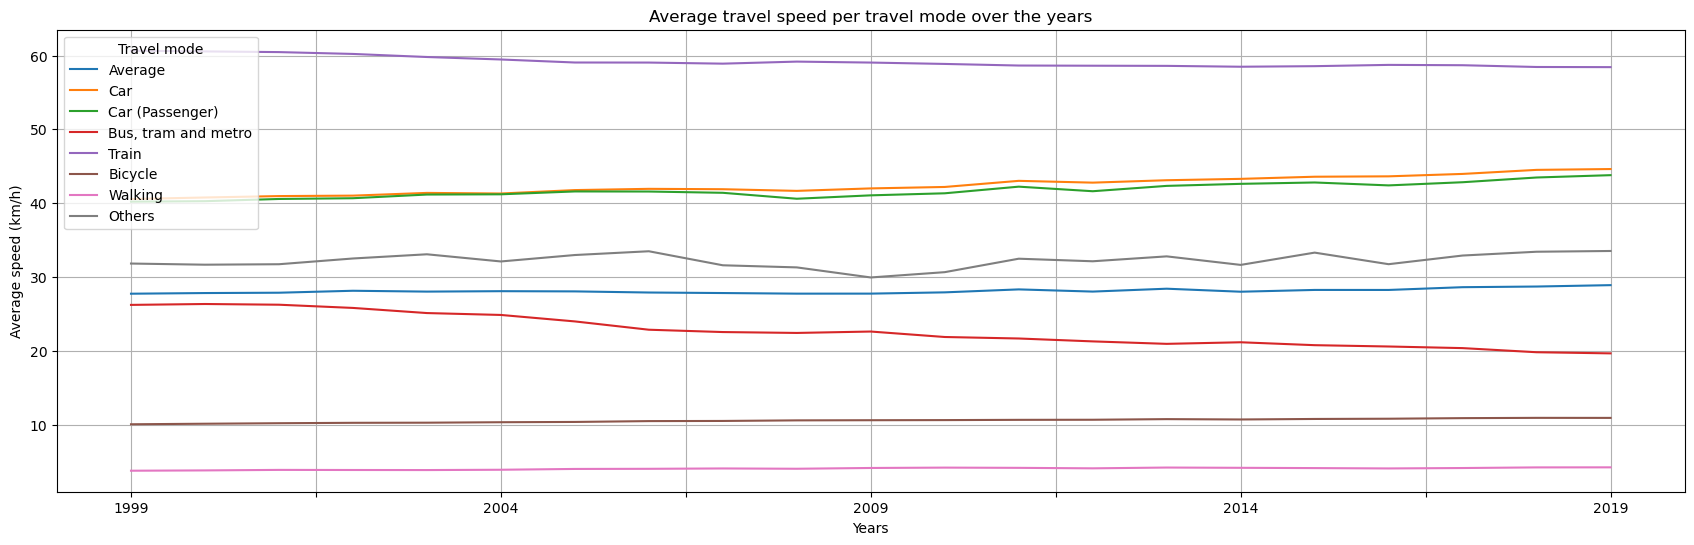

In [4]:
plt.figure(figsize=(21, 6), dpi=100)
speeddata.plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed per travel mode over the years')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel mode', loc='upper left')
plt.savefig('Figures/SubquestionWouterJelle_figures/travelmotives.png')

<Figure size 2100x600 with 0 Axes>

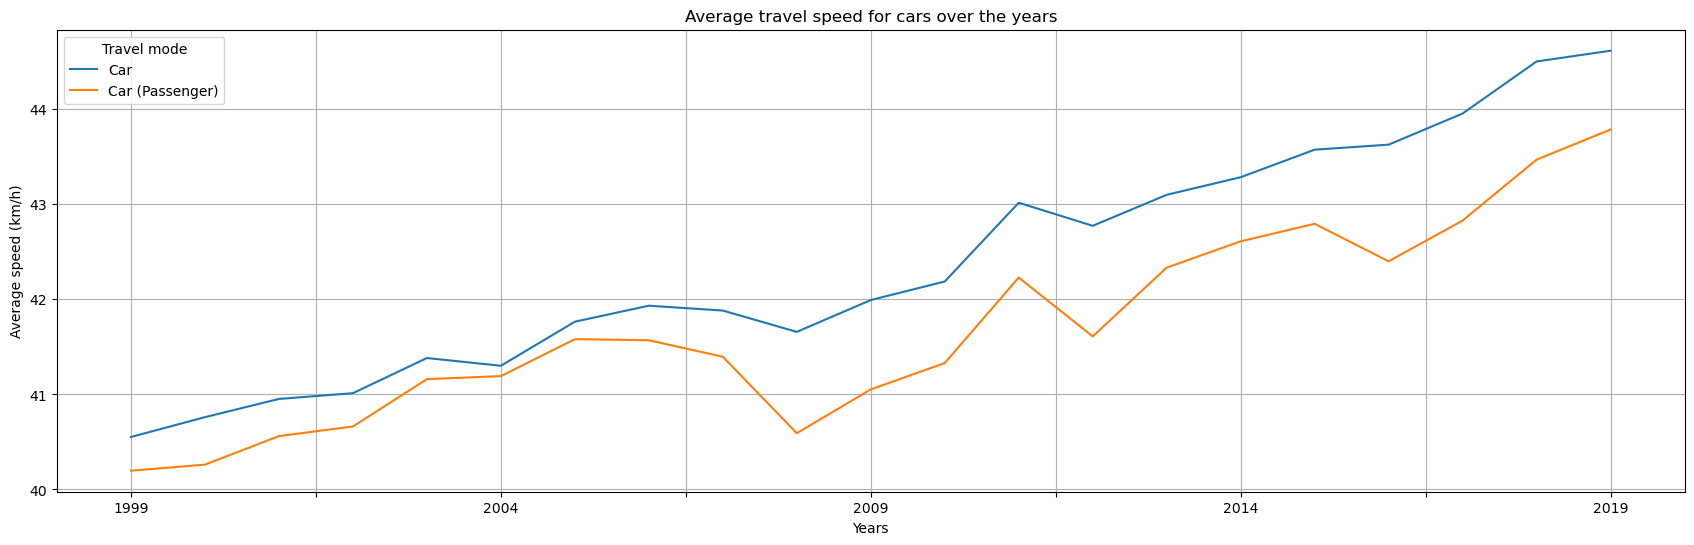

In [5]:
#Cars
car_columns = ['Car', 'Car (Passenger)']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[car_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for cars over the years')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel mode', loc='upper left')
plt.savefig('Figures/SubquestionWouterJelle_figures/travelspeecars.png')

<Figure size 2100x600 with 0 Axes>

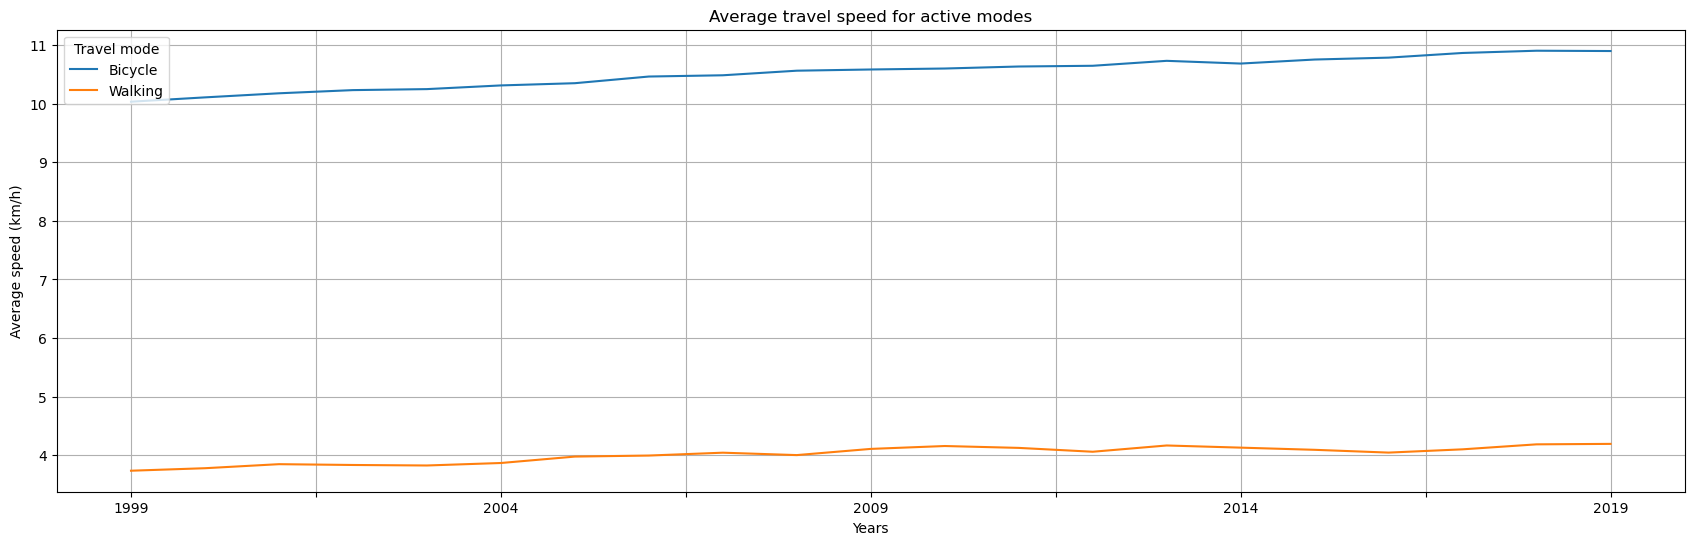

In [6]:
#Active modes
active_columns = ['Bicycle', 'Walking']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[active_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for active modes')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel mode', loc='upper left')
plt.savefig('Figures/SubquestionWouterJelle_figures/travelspeedactivemodes.png')

<Figure size 2100x600 with 0 Axes>

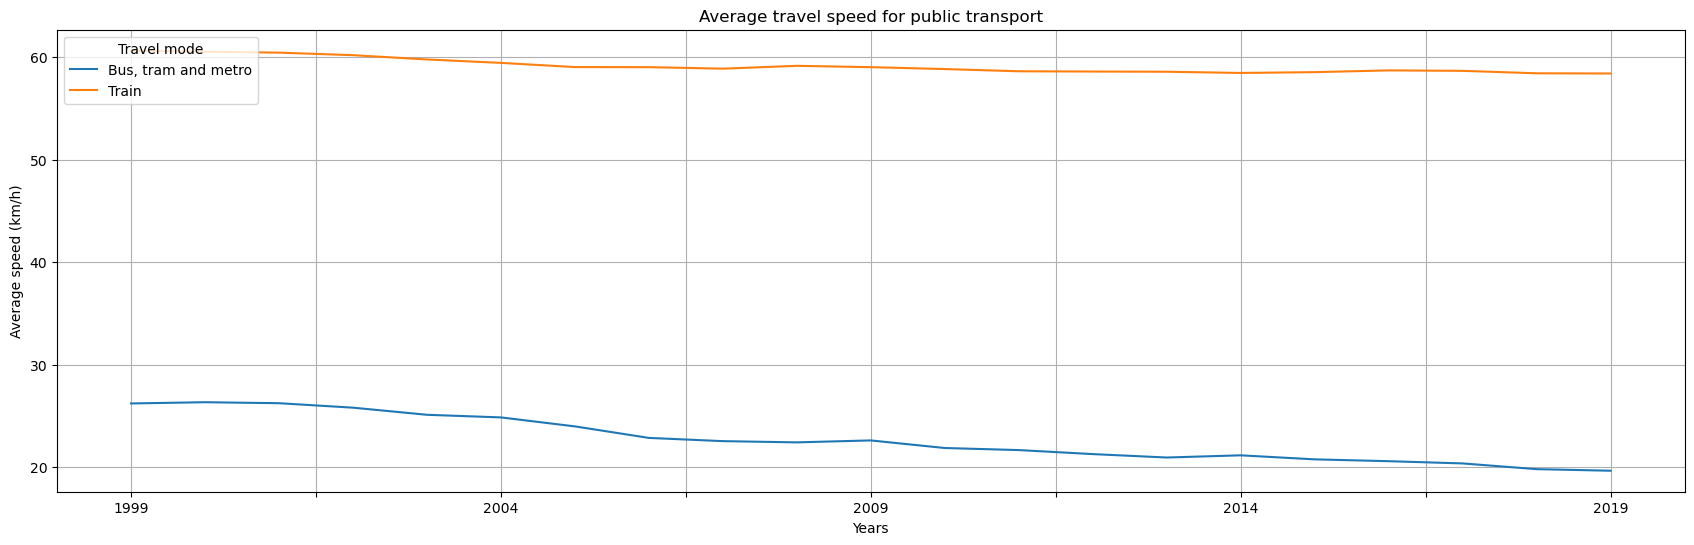

In [7]:
#Public transport
active_columns = ['Bus, tram and metro', 'Train']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[active_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for public transport')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel mode', loc='upper left')
plt.savefig('Figures/SubquestionWouterJelle_figures/travelspeedpublictransport.png')

<Figure size 2100x600 with 0 Axes>

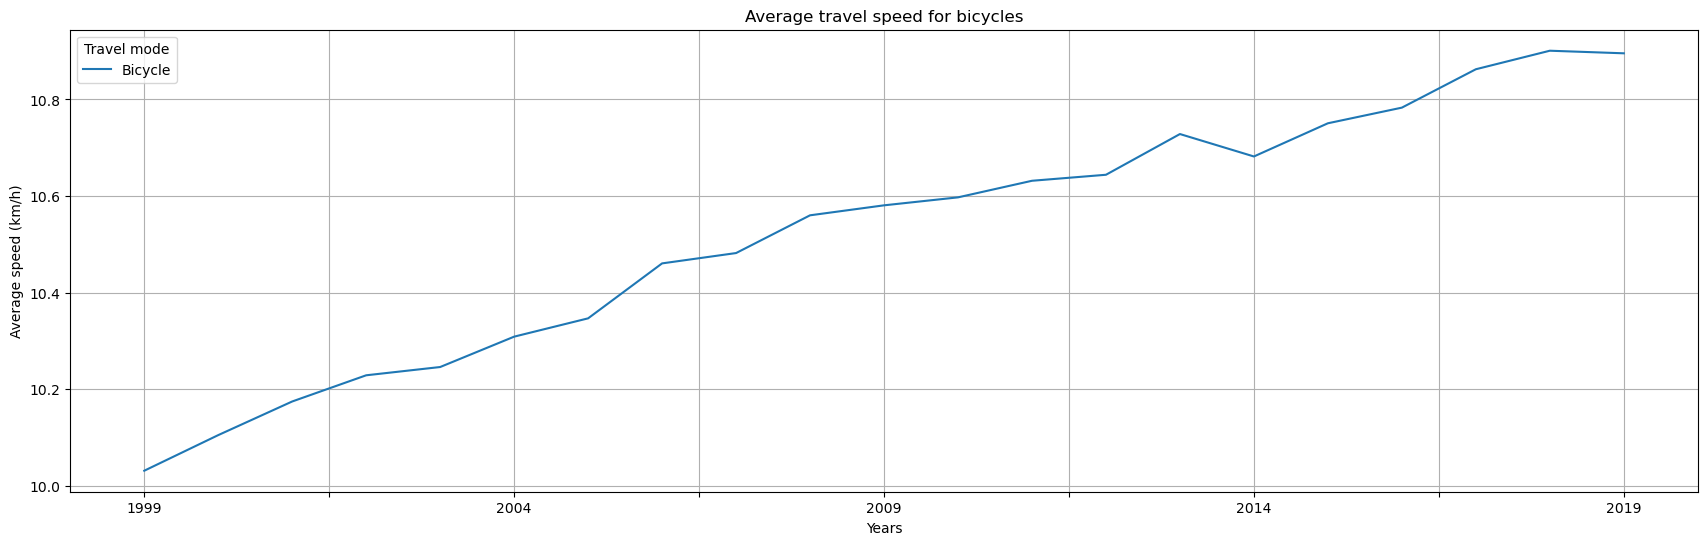

In [8]:
#Only  bikes
bicycle_columns = ['Bicycle']

plt.figure(figsize=(21, 6), dpi=100)
speeddata[bicycle_columns].plot(figsize=(21, 6))
plt.grid()
plt.title('Average travel speed for bicycles')
plt.xlabel('Years')
plt.ylabel('Average speed (km/h)')
plt.legend(title='Travel mode', loc='upper left')
plt.savefig('Figures/SubquestionWouterJelle_figures/travelspeedbicycles.png')